In [1]:


import os

import matplotlib.pyplot as plt
import pandas as pd
# import seaborn as sns
import numpy as np
from sklearn.manifold import TSNE
import pickle

In [2]:
def load_files(path):
    df = pd.read_csv(path+'clustering_results.csv')
    
    domain = df['predictions'].values
    
    vec_d = df['vec_d_labels'].values
    vec_y = df['vec_y_labels'].values
    img_locs = df['image_id_labels'].values

    Z = np.load(path + "Z_space.npy")
    model_name = path.split('_')[-1]

    #args = np.loadtxt(path + "arguments.txt", dtype=str, usecols=0)  # , delimiter = '\n')
    #img_locs = np.loadtxt(path + "img_id.txt", dtype=str)
    with open(os.path.join(path, 'commandline_arguments.p'), 'rb') as file:
        command_line = pickle.load(file)
    
    return domain, vec_d, vec_y, img_locs, model_name, df, command_line

In [3]:
ex = '2023-09-28 12:47:42.403147_weah_sdcn/'
#ex = '2023-10-03 15:29:14.413030_weah_dec/'
#ex = '2023-10-10 11:09:07.411289_weah_dec/'

ex = '2023-10-15 16:52:23.823748_weah_sdcn/'

In [4]:
domain, vec_d, vec_y, img_locs, model_name, results_df, command_line = load_files(ex)
print(command_line)

Namespace(config_file=None, lr=0.0001, gamma_reg=0.1, es=10, seed=0, nocu=False, device=None, gen=False, keep_model=False, epos=5, epo_te=1, debug=False, dmem=False, no_dump=False, trainer=None, out='zoutput', dpath='../../WashU_with_coord/combined_training_with_coords/', tpath=None, npath=None, npath_dom=None, npath_argna2val=None, nname_argna2val=None, nname=None, nname_dom=None, apath='domid/algos/builder_sdcn.py', exptag='exptag', aggtag='aggtag', bm_dir=None, msel=None, aname='sdcn', acon=None, task='weah', bs=2700, split=0, te_d=['0'], tr_d=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64'], san_check=False, san_num=8, zd_dim=500, zx_dim=0, zy_dim=64, topi

In [42]:



def plot_something_per_domain(domain, another_label, counts, fs,colors, legend = False, thres = None, ax=None):
    """
    domain - predicted domain labels
    another_label - another label aassociated with each predicted domain (should be same shape as domain)
    counts - countes of each another label in each of the predicted domain (see something_per_domain function)
    fs - font size
    colors - colors of each segment on the bargraph
    legend - legend of unique another lables
    thres - if thresholding of another label is required then should be shpecifies (also see apply_threshold function)
    
    """
    if ax is None:
        ax = plt.gca()
    u_domains = np.unique(domain)
    N = len(u_domains)
    
    u_another_label = np.unique(another_label)
    print('unique labels', u_another_label)
    counts = np.array(counts)
    narray = np.array_split(counts, N)

    if thres:
        u_another_label_dic = apply_threshold(u_another_label, narray, thres, N)
        print(u_another_label_dic.values())
        u_another_label = list(u_another_label_dic.keys())
        narray = list(u_another_label_dic.values())
        narray = np.transpose(narray)
        

    for i in range(0, len(u_domains)):
        for jj in range(0,len(u_another_label)):
            
            if jj>0:
                bottom = np.sum(narray[i][:jj])/np.sum(narray[i])
            else:
                bottom = 0
            ax.bar(i, narray[i][jj]/np.sum(narray[i]), bottom = bottom, color = colors[jj])
    x = np.linspace(0, N-1, N)
    x_ticks = u_domains
    ax.set_ylabel("Proportion", fontsize=fs)
    ax.set_xticks(x, x_ticks, fontsize=fs)
    ax.set_xlabel("Cluster", fontsize=fs)
    ax.set_ylim(0, 1.025)
    #ax.margins(1.5,1.5)
   
    if legend:
        ax.legend(legend, fontsize= fs-4, bbox_to_anchor=(1.7, 0.5))
    else:
        ax.legend(u_another_label)

    return ax
    

    #return 
        
    
    
    

In [6]:
def something_per_domain(domain, another_label):
    """
    domain - predicted domain labels 
    another_label - some other label that corresponds to each of the predicted domain (
    assumed that both domain and something have the same img_loc reference order 
    """
    u_something = np.unique(another_label)
    u_domain = np.unique(domain)
    array_counters=[]
    for i in u_something:
        for j in u_domain:
            counter = 0
            for idx in range(0, len(domain)):
                if domain[idx]==j and another_label[idx]==i:
                    counter+=1
            array_counters.append(counter)
    return array_counters  

In [7]:



def img_loc_true_label2(results_df, df, df_label):
    """
    img_loc_true_label - location of the image (ex. .../../../aperio-001-0_anno_2_reg_4CAH_patchnumber_3.png)
    df - dataframe that compiles img loc reference and other labels corresponding to that image
    df_label - the name of the label in the df that one would like to retrieve from the df
    """
    
    merged_df = pd.merge(results_df, df, on='img_names', how='inner')
    another_label_array = merged_df[df_label].tolist()

    return another_label_array

In [11]:
import pandas as pd
import os
print(os.listdir('../../../WashU_with_coord'))
df = pd.read_csv('../../../WashU_with_coord/dset_WEAH_65_subjects_9_regions.csv')
results_df['img_names']=results_df['image_id_labels'].str.split('/').str.get(-1)
df['img_names']=df['path'].str.split('/').str.get(-1)
results_df['image_id_labels'].str.split('/').str.get(-1)

['Training', '.ipynb_checkpoints', 'combined_training', 'combined_training2', 'extracted_annotationsOutside_WashU_Aperio_bugged', 'extracted_annotationsOutside_WashU_Aperio_bugged_2', 'extracted_annotationsOutside_WashU_Aperio', 'combined_training_with_coords', 'TrainingOutside', 'dset_WEAH_.csv', 'dset_WEAH_65_subjects_3_regions.csv', 'dset_WEAH_65_subjects_9_regions.csv']


0        aperio-113-0_anno_3_reg_1Benign_coord_19289_65...
1        aperio-113-0_anno_3_reg_10Outside_coord_19289_...
2        aperio-113-0_anno_3_reg_10Outside_coord_19289_...
3        aperio-113-0_anno_3_reg_3Outside_coord_46234_7...
4        aperio-113-0_anno_3_reg_2Outside_coord_40864_6...
                               ...                        
58495    aperio-060-0_anno_1_reg_4Carcinoma_coord_78405...
58496    aperio-060-0_anno_1_reg_4Carcinoma_coord_78405...
58497    aperio-060-0_anno_1_reg_8Carcinoma_coord_86126...
58498    aperio-060-0_anno_1_reg_2Carcinoma_coord_67366...
58499    aperio-060-0_anno_1_reg_6Carcinoma_coord_88756...
Name: image_id_labels, Length: 58500, dtype: object

In [12]:
resp_label = img_loc_true_label2(results_df, df, 'resp')


In [13]:
true_responders_per_domain= something_per_domain(domain, resp_label)

unique labels [0 1]


<Axes: xlabel='Cluster', ylabel='Proportion'>

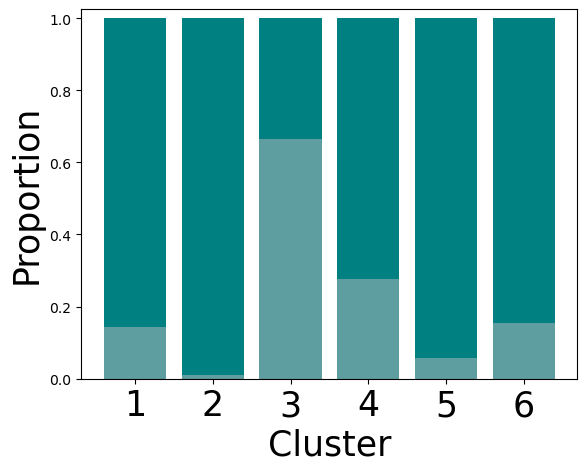

In [14]:
resp_label = img_loc_true_label2(results_df, df, 'resp')
true_responders_per_domain= something_per_domain(domain, resp_label)
plot_something_per_domain(domain, resp_label, true_responders_per_domain, 25, ['cadetblue', 'teal'], legend = ['non resp', 'resp'])

unique labels [1 2 3]


<Axes: xlabel='Cluster', ylabel='Proportion'>

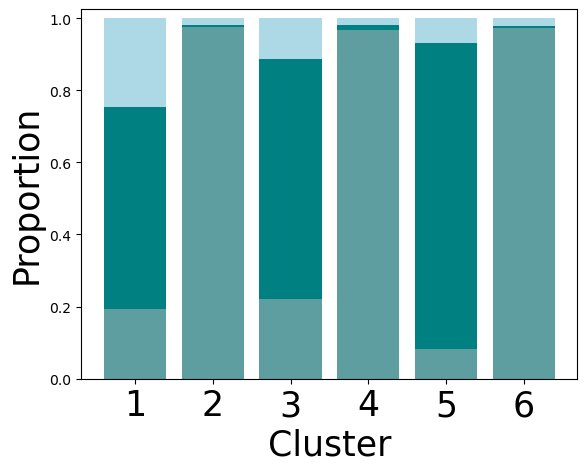

In [15]:
ann_label = img_loc_true_label2(results_df, df, 'ann')
true_ann_per_domain= something_per_domain(domain, ann_label)

plot_something_per_domain(domain, ann_label, true_ann_per_domain, 25, ['cadetblue', 'teal', 'lightblue'], legend = ['CAH', 'Car','Benign'])


In [25]:
# import matplotlib.image as mpimg
# img = mpimg.imread
def vizualize_images_per_domain(d, num, N, base_path="../"):
    plt.figure(figsize=(10, 10))
    for j in range(1, N):
        d_path = d[j] if d[j].startswith("/") else base_path + d[-j]
        img = torchvision.io.read_image(d_path)
        plt.subplot(10, 10, j)
        plt.imshow(img.permute(1, 2, 0))
        plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
        name = d[j].split("/")[-1].split('-')
        #print(name)
        #title = "responder" +name[2].split('_')[2]
    # plt.suptitle("Domain " + str(num), fontsize=50)
    #     # if j == 1:
    #     #     plt.ylabel("Domain " + str(num), fontsize=15, fontweight="bold")
    plt.show()

In [34]:
# Seperate predicted domains by numbers. All predicted 1s are in d1, etc....
d1 = []
d2 = []
d3 = []
d4 = []
d5 = []
d6 = []
for i in range(len(domain)):
    if i%2==0:
        if domain[i] == 1:
            d1.append(img_locs[i])
        if domain[i] == 2:
            d2.append(img_locs[i])
        if domain[i] == 3:
            d3.append(img_locs[i])
        if domain[i] == 4:
            d4.append(img_locs[i])
        if domain[i] == 5:
            d5.append(img_locs[i])
        if domain[i] == 6:
            d6.append(img_locs[i])
# d3 = d2[-1000:]
# d5+=d5*10
# d6+=d6
# d1+=d1*2
domain_images_lib = [d1, d2, d3, d4, d5, d6]

In [35]:
15*20

300

In [36]:

print(len(d1), len(d2), len(d3), len(d4), len(d5), len(d6))

1004 3944 816 22760 283 443


2
6
10
14
18
22
unique labels [0 1]
unique labels [1 2 3]


/tmp/ipykernel_4088496/1283331601.py:55: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig.tight_layout()
/tmp/ipykernel_4088496/1283331601.py:55: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


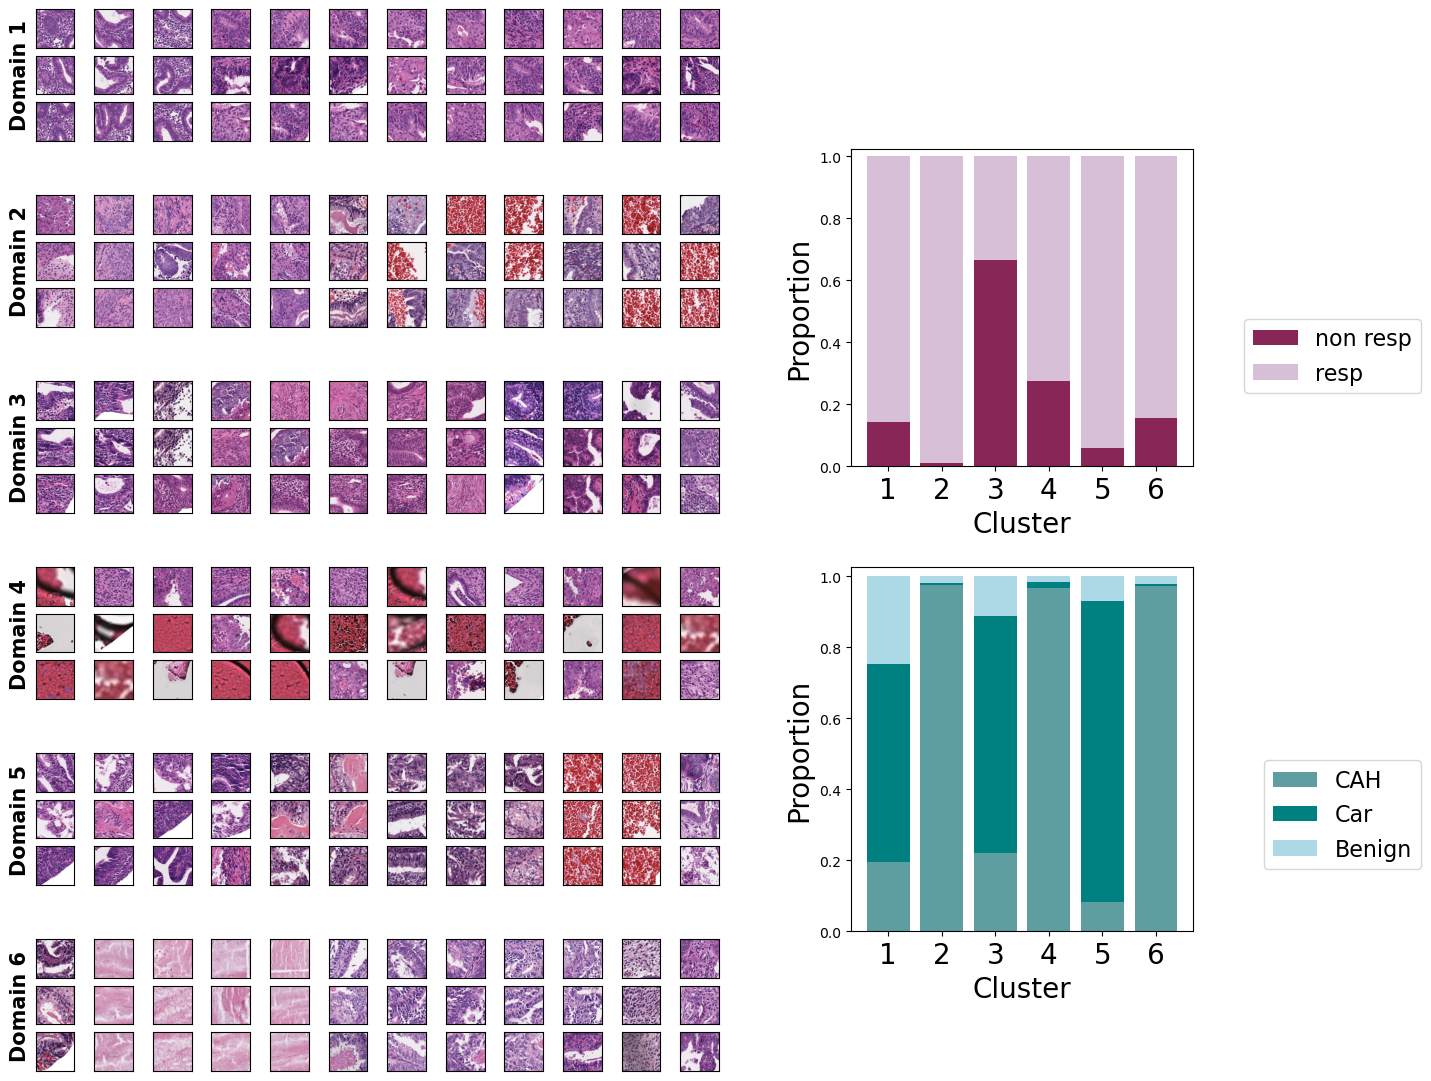

In [62]:
import matplotlib.pyplot as plt
import torchvision
from matplotlib.gridspec import GridSpec

fs_xlabel =15
            
fig = plt.figure(figsize=(15,15), layout="constrained")
N_split=12
n_rows = 25
n_cols=20
gs = GridSpec(n_rows, n_cols, figure=fig)
counter = 0
counter_d = 0
domain_to_plot = [0,0,0,1,1,1,2,2,2,3,3,3,4,4,4,5,5,5]
k=1
for i in range(0, N_split):
    counter_d=0
    for j in range(1, 24):
        
        if j%4!=0:
            ax = fig.add_subplot(gs[j, i])
            domain_to_plot_idx = domain_to_plot[counter_d]
            counter_d+=1
            d = domain_images_lib[domain_to_plot_idx]
            base_path="../"
            d_path = d[counter] if d[counter].startswith("/") else base_path + d[counter]
            img = torchvision.io.read_image(d_path)
            ax.imshow(img.permute(1, 2, 0))
            ax.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
            counter+=1
            if i==0:
                
                if (j+2)%4==0:
                    print(j)
                    ax.set_ylabel('Domain '+str(domain_to_plot_idx+1), fontsize = fs_xlabel, weight='bold')
          
            
        

# identical to ax1 = plt.subplot(gs.new_subplotspec((0, 0), colspan=3))
n_mid = int(n_rows//2)

ax2 = fig.add_subplot(gs[4:n_mid-1, N_split+2:])
ax3 = fig.add_subplot(gs[n_mid+1:-4:, N_split+2:])


resp_label = img_loc_true_label2(results_df, df, 'resp')
true_responders_per_domain= something_per_domain(domain, resp_label)
plot_something_per_domain(domain, resp_label, true_responders_per_domain, 20, ['#872657', 'thistle'], legend = ['non resp', 'resp'], ax = ax2)

ann_label = img_loc_true_label2(results_df, df, 'ann')
true_ann_per_domain= something_per_domain(domain, ann_label)
plot_something_per_domain(domain, ann_label, true_ann_per_domain, 20, ['cadetblue', 'teal', 'lightblue'], legend = ['CAH', 'Car','Benign'], ax=ax3)

fig.tight_layout()
plt.show()